## Let's first import all needed libs

In [17]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import STL
import seaborn as sns
import matplotlib.pyplot as plt 
color_pal = sns.color_palette()

## Now let's load our dataset

In [18]:
df = pd.read_csv('../data/processed/cleaned_dataset.csv')
df = df.drop(columns='id')


## Now let's split our time series into training/test sequences

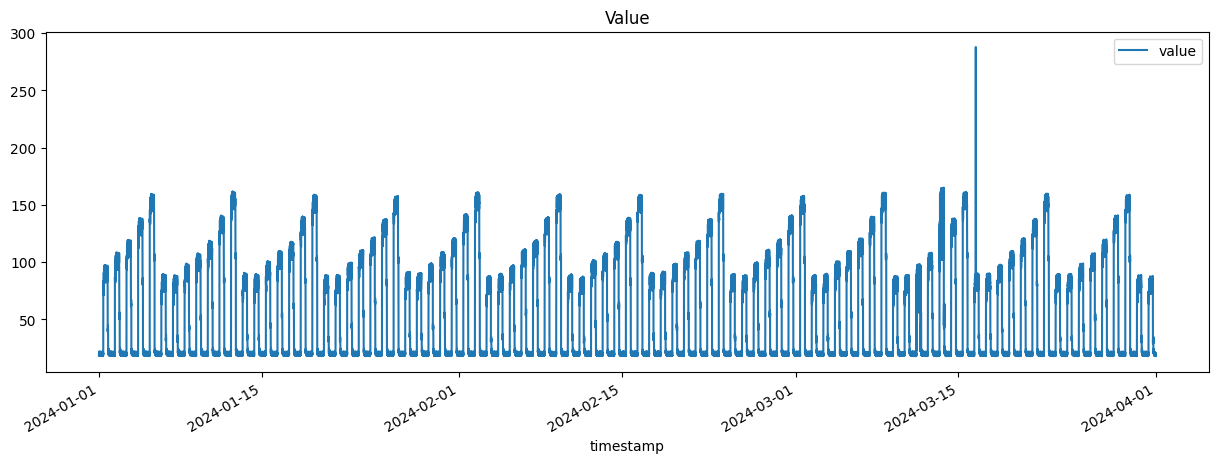

In [19]:
df = df.set_index('timestamp')
df.index = pd.to_datetime(df.index)
df.plot(
    figsize=(15,5),
    color=color_pal[0],
    title='Value'
)
plt.show()

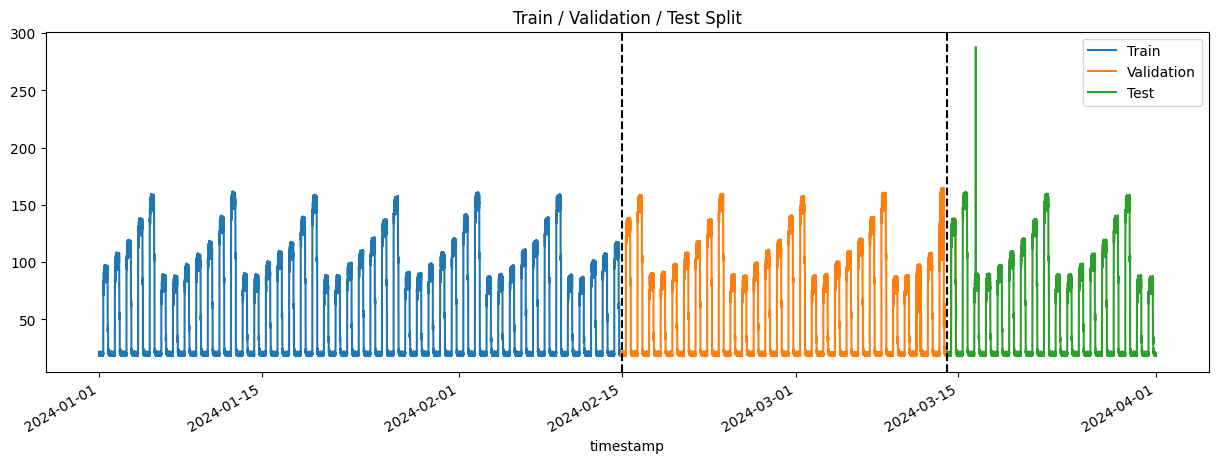

In [20]:
train = df.loc[df.index <  '02-15-2024 00:00:00']
value = df.loc[(df.index >= '02-15-2024 00:00:00') &
               (df.index <  '03-15-2024 00:00:00')]
test  = df.loc[df.index >= '03-14-2024 00:00:00']
fig, ax = plt.subplots(figsize=(15, 5))

train.plot(ax=ax, label='Train')
value.plot(ax=ax, label='Validation')
test.plot(ax=ax, label='Test')

ax.axvline('2024-02-15 00:00:00', color='black', ls='--')
ax.axvline('2024-03-14 00:00:00', color='black', ls='--')

ax.set_title('Train / Validation / Test Split')
ax.legend(['Train','Validation','Test'])

plt.show()

In [23]:
stl = STL(train,period=288,robust=True)

res = stl.fit()

resid = res.resid.dropna()
z = (resid - resid.mean())/resid.std()

anomalies = resid[np.abs(z) > 3]
anomalies

timestamp
2024-01-05 09:00:00    105.790957
2024-01-05 09:00:00    104.978698
2024-01-05 09:05:00    100.396617
2024-01-05 09:05:00     99.856453
2024-01-05 09:10:00     97.428728
                          ...    
2024-02-09 13:00:00     74.913662
2024-02-09 13:10:00     80.902485
2024-02-09 13:10:00     80.551451
2024-02-09 13:15:00     74.620690
2024-02-09 13:15:00     74.233872
Name: resid, Length: 620, dtype: float64